# Introduction

Tasks: Building, Backsetting and Optimising a Portfolio

Time Frame: 2020-2024


# Importing Libraries

In [47]:
# Core packages
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting style
plt.style.use('ggplot')

# Data Retrieval

In [48]:
# List of 10 stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'TSLA', 'JPM', 'UNH', 'PG']

# Collecting data for multiple tickers
all_data = []

# Loop through tickers and download each separately
for ticker in tickers:
    df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
    df['Ticker'] = ticker 
    df.columns = df.columns.droplevel(1)
    all_data.append(df)

# Combine all into a single DataFrame
df_all = pd.concat(all_data)

# Reset index to move Date from index to column
df_all.reset_index(inplace=True)

# Optional: Rearranging columns for clarity
df_all = df_all[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

df_all

/tmp/ipykernel_1573/1703388271.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1573/1703388271.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_1573/1703388271.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1573/1703388271.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1573/1703388271.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1573/1703388271.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tm

Price,Date,Ticker,Open,High,Low,Close,Volume
0,2020-01-02,AAPL,71.627077,72.681274,71.373203,72.620827,135480400
1,2020-01-03,AAPL,71.847102,72.676431,71.689942,71.914803,146322800
2,2020-01-06,AAPL,71.034724,72.526549,70.783263,72.487862,118387200
3,2020-01-07,AAPL,72.497514,72.753808,71.926900,72.146927,108872000
4,2020-01-08,AAPL,71.849518,73.609729,71.849518,73.307495,132079200
...,...,...,...,...,...,...,...
12565,2024-12-23,PG,166.006638,166.619058,164.327412,166.056030,6983900
12566,2024-12-24,PG,165.572021,167.112958,165.374467,166.875900,2460800
12567,2024-12-26,PG,166.253591,168.219283,166.016533,168.080994,3629400
12568,2024-12-27,PG,167.350038,168.673662,167.191989,167.458694,4367900


# Data Cleaning


In [49]:

print(f"The amount of null values in the dataset are {df_all.isnull().sum().sum()}")
print(f"The amount of duplicate values in the dataset are {df_all.duplicated().sum()}")
print(df_all.dtypes)
print(df_all.info())

# There are no null values or duplicates in the dataset
# The data types are appropriate for analysis

The amount of null values in the dataset are 0
The amount of duplicate values in the dataset are 0
Price
Date      datetime64[ns]
Ticker            object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12570 entries, 0 to 12569
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12570 non-null  datetime64[ns]
 1   Ticker  12570 non-null  object        
 2   Open    12570 non-null  float64       
 3   High    12570 non-null  float64       
 4   Low     12570 non-null  float64       
 5   Close   12570 non-null  float64       
 6   Volume  12570 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 687.6+ KB
None


# Data Exploration

In [50]:
# Pivoting the DataFrame to have Ticker as columns and Date as index
df_pivot = df_all.pivot(index='Date', columns='Ticker', values='Close')

# Presenting the head and tail of the wide DataFrame
print(df_pivot.head())
print(df_pivot.tail())


Ticker           AAPL       AMZN      GOOGL         JPM        META  \
Date                                                                  
2020-01-02  72.620827  94.900497  68.026024  120.733536  208.635406   
2020-01-03  71.914803  93.748497  67.670151  119.140305  207.531464   
2020-01-06  72.487862  95.143997  69.473839  119.045570  211.440048   
2020-01-07  72.146927  95.343002  69.339645  117.021729  211.897522   
2020-01-08  73.307495  94.598503  69.833183  117.934647  214.045746   

Ticker            MSFT      NVDA          PG       TSLA         UNH  
Date                                                                 
2020-01-02  153.042252  5.971745  107.748245  28.684000  268.711060  
2020-01-03  151.136642  5.876163  107.023567  29.534000  265.991760  
2020-01-06  151.527328  5.900806  107.171997  30.102667  267.838287  
2020-01-07  150.145737  5.972245  106.508461  31.270666  266.221436  
2020-01-08  152.537292  5.983447  106.962479  32.809334  271.834473  
Ticker      

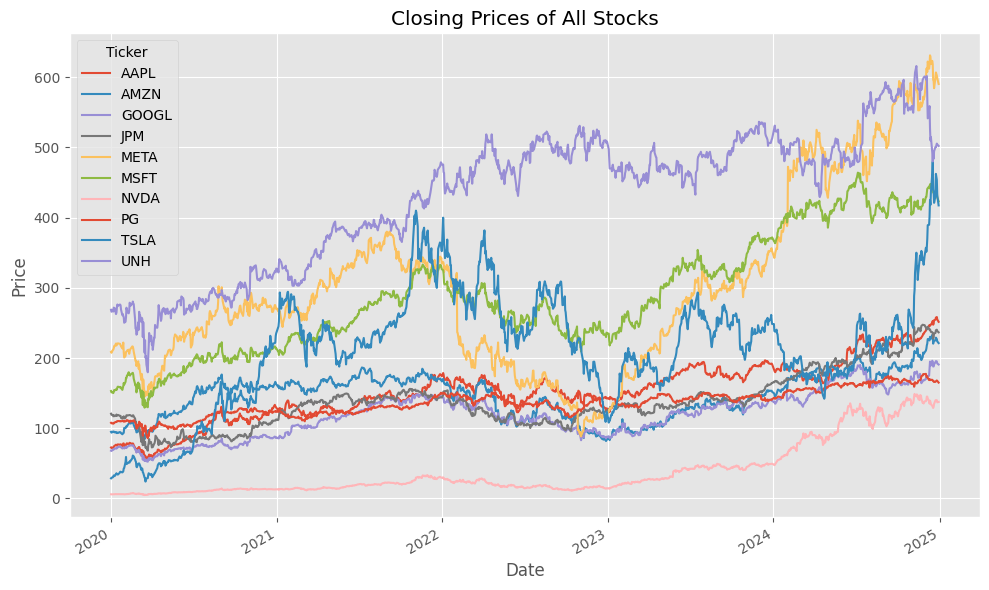

In [51]:
#Creating a line plot for the closing prices of all stocks
df_pivot.plot(figsize=(10, 6))
plt.title('Closing Prices of All Stocks')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(title='Ticker')

#Removing the unnecessary output
plt.tight_layout()
